## UNSUPERVISED LEARNING MINI PROJECT

### CONTEXT

> E-commerce has become a new channel to support businesses development. Through e-commerce, businesses can get access and establish a wider market presence by providing cheaper and more efficient distribution channels for their products or services. E-commerce has also changed the way people shop and consume products and services. Many people are turning to their computers or smart devices to order goods, which can easily be delivered to their homes.

### CONTENT
> This is a sales transaction data set of UK-based e-commerce (online retail) for one year. This London-based shop has been selling gifts and homewares for adults and children through the website since 2007. Their customers come from all over the world and usually make direct purchases for themselves. There are also small businesses that buy in bulk and sell to other customers through retail outlet channels.

> The data set contains 500K rows and 8 columns. The following is the description of each column.

> - **TransactionNo (categorical)**: a six-digit unique number that defines each transaction. The letter “C” in the code indicates a cancellation.
> - **Date (numeric)**: the date when each transaction was generated.
> - **ProductNo (categorical)**: a five or six-digit unique character used to identify a specific product.
> - **Product (categorical)**: product/item name.
> - **Price (numeric)**: the price of each product per unit in pound sterling (£).
> - **Quantity (numeric)**: the quantity of each product per transaction. Negative values related to cancelled transactions.
> - **CustomerNo (categorical)**: a five-digit unique number that defines each customer.
> - **Country (categorical)**: name of the country where the customer resides.

### GOAL

> Gather useful intrinsic information by combining RFM model and some unsupervised learning model. 

> For each segments, analyze the data, and try to answer the following questions:

> - How was the sales trend over the months?
> - What are the most frequent purchased products?
> - How many products does the customer purchase in each transaction?
> - How does each cluster/group contribute to the company's revenue?
> - What are the interval date between transactions?
> - Based on your findings, what strategy could you recommend to the business to gain more profit?
> - ***add more if necessary***

> Also, there is a small percentage of order cancellation in the data set. Most of these cancellations were due to out-of-stock conditions on some products. Under this situation, customers tend to cancel an order as they want all products delivered all at once. 

> Therefore, try to build a supervised learning model to solve this problem.

> Source from UCI Machine Learning Repository: [link to dataset](https://archive.ics.uci.edu/ml/datasets/online+retail)

## OVERVIEW

In [1]:
# import all necessary library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

> Here we will inspect the data for quality checking.

In [2]:
# load data
df = pd.read_excel("https://archive.ics.uci.edu/ml/machine-learning-databases/00352/Online%20Retail.xlsx")

In [3]:
# check head
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [4]:
# check datatype
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


> We can see that there are 2 features with missing values (null).

In [5]:
# check null
df.isna().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

## PREPROCESSING

> Since many of the missing values is on the important features (CustomerID), and it's considered as an identifier that will plays an important role to the RFM models, therefore we cannot do anything to this other than dropping the values on this features.

In [6]:
# dropna
df = df.dropna()

In [7]:
# check info after dropping
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 406829 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    406829 non-null  object        
 1   StockCode    406829 non-null  object        
 2   Description  406829 non-null  object        
 3   Quantity     406829 non-null  int64         
 4   InvoiceDate  406829 non-null  datetime64[ns]
 5   UnitPrice    406829 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      406829 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 27.9+ MB


> Since the missing values has been handled, next we will try to create a new features (TotalCost) that will play an important role on RFM for monetary value later.

> *TotalCost = Quantity x UnitPrice*.

In [8]:
# create TotalCost
df["TotalCost"] = df["Quantity"]*df["UnitPrice"]

In [9]:
# check new features
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalCost
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


> Then we will adjust the InvoiceDate format. We will create a new feature for it, so that it will fit the RFM model.

In [10]:
# create new feature and change its type
df["TransactionDate"] = pd.to_datetime(df["InvoiceDate"]).dt.date
df["TransactionDate"] = pd.to_datetime(df["TransactionDate"])

In [11]:
# check new features
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalCost,TransactionDate
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,2010-12-01
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010-12-01
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,2010-12-01
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010-12-01
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010-12-01


> We will also prepare the 'target' feature for supervised prediction later.

In [12]:
# prepare target feature, 1 : cancelled order, 0 : completed order
cancel = []
for i in df["InvoiceNo"]:
    if str(i).startswith("C"):
        cancel.append(1)
    else:
        cancel.append(0)

In [13]:
# apply target
df["cancelled"] = cancel

In [14]:
# check info
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 406829 entries, 0 to 541908
Data columns (total 11 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   InvoiceNo        406829 non-null  object        
 1   StockCode        406829 non-null  object        
 2   Description      406829 non-null  object        
 3   Quantity         406829 non-null  int64         
 4   InvoiceDate      406829 non-null  datetime64[ns]
 5   UnitPrice        406829 non-null  float64       
 6   CustomerID       406829 non-null  float64       
 7   Country          406829 non-null  object        
 8   TotalCost        406829 non-null  float64       
 9   TransactionDate  406829 non-null  datetime64[ns]
 10  cancelled        406829 non-null  int64         
dtypes: datetime64[ns](2), float64(3), int64(2), object(4)
memory usage: 37.2+ MB


> Now that we've finished the preprocess, we will copy the data and then start to build the rfm model.

In [15]:
# create copy for rfm modeling
df1 = df.copy()

In [16]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalCost,TransactionDate,cancelled
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,2010-12-01,0
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010-12-01,0
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,2010-12-01,0
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010-12-01,0
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010-12-01,0


## RFM MODEL BUILDING

> We will create a table that will accommodate the information needed to perform an RFM analysis.

> We will make it starting from its Recency first. Recency is the date of the customer transaction in the invoice.

In [17]:
# last transaction date on invoice
now = pd.to_datetime(df['TransactionDate'].max())

In [18]:
# get customers Last transaction date
recency = df.groupby(by='CustomerID', as_index=False)['TransactionDate'].max()
recency.columns = ['CustomerID', 'last_trans_date']

In [19]:
# calculate recency
recency['last_trans_date'] = pd.to_datetime(recency['last_trans_date'])
recency['recency'] = recency['last_trans_date'].apply(lambda x: (now-x).days)

In [20]:
# recency table
recency.head()

,CustomerID,last_trans_date,recency
0,12346.0,2011-01-18,325
1,12347.0,2011-12-07,2
2,12348.0,2011-09-25,75
3,12349.0,2011-11-21,18
4,12350.0,2011-02-02,310


> Next we will create a frequency column. Frequency is the number of transactions per customer.

In [21]:
# calculate frequency
frequency = pd.DataFrame()
frequency["CustomerID"] = [i for i in df["CustomerID"].unique()]
frequency["frequency"] = df.groupby('CustomerID')['CustomerID'].transform('count')

In [22]:
# frequency table
frequency.head()

,CustomerID,frequency
0,17850.0,312.0
1,13047.0,312.0
2,12583.0,312.0
3,13748.0,312.0
4,15100.0,312.0


> The next column to be created is the monetary column. Monetary is the sum of total spending per customer in pounds.

In [23]:
# calculate monetary
monetary = df.groupby(by='CustomerID', as_index=False).agg({'Quantity': 'sum'})
monetary.columns = ['CustomerID', 'monetary']

In [24]:
# monetary table
monetary.head()

,CustomerID,monetary
0,12346.0,0
1,12347.0,2458
2,12348.0,2341
3,12349.0,631
4,12350.0,197


> Lastly is the merging of the 3 new columns into one table.

In [25]:
# create rfm table
rf = pd.merge(recency, frequency, on="CustomerID")
rfm = pd.merge(rf, monetary, on="CustomerID")

In [26]:
rfm["frequency"] = rfm["frequency"].fillna(rfm["frequency"].median())

In [27]:
rfm.head()

,CustomerID,last_trans_date,recency,frequency,monetary
0,12346.0,2011-01-18,325,180.0,0
1,12347.0,2011-12-07,2,180.0,2458
2,12348.0,2011-09-25,75,123.0,2341
3,12349.0,2011-11-21,18,258.0,631
4,12350.0,2011-02-02,310,5903.0,197


In [28]:
# split rfm quantiles
quantiles = rfm.quantile(q=[0.25, 0.5, 0.75])
quantiles

,CustomerID,recency,frequency,monetary
0.25,13812.75,16.0,91.0,153.00
0.50,15300.50,50.0,143.0,365.00
0.75,16778.25,143.0,258.0,962.25


In [29]:
# function to get quantiles score
# arguments : (x = value, p = recency, monetary_value, frequency, k = quartiles dict)

def RScore(x, p, d):
    if x <= d[p][0.25]:
        return 1
    elif x <= d[p][0.50]:
        return 2
    elif x <= d[p][0.75]:
        return 3
    else:
        return 4


def FMScore(x, p, d):
    if x <= d[p][0.25]:
        return 4
    elif x <= d[p][0.50]:
        return 3
    elif x <= d[p][0.75]:
        return 2
    else:
        return 1

In [30]:
# rfm segmentations score
rfm['R_Quartile'] = rfm['recency'].apply(RScore, args=('recency', quantiles))
rfm['F_Quartile'] = rfm['frequency'].apply(FMScore, args=('frequency', quantiles))
rfm['M_Quartile'] = rfm['monetary'].apply(FMScore, args=('monetary', quantiles))

In [31]:
# calculate rfm score
rfm['RFMScore'] = rfm["R_Quartile"].map(str)+rfm["F_Quartile"].map(str)+rfm["M_Quartile"].map(str)

In [32]:
# rfm segmentation table
rfm.head()

,CustomerID,last_trans_date,recency,frequency,monetary,R_Quartile,F_Quartile,M_Quartile,RFMScore
0,12346.0,2011-01-18,325,180.0,0,4,2,4,424
1,12347.0,2011-12-07,2,180.0,2458,1,2,1,121
2,12348.0,2011-09-25,75,123.0,2341,3,3,1,331
3,12349.0,2011-11-21,18,258.0,631,2,2,2,222
4,12350.0,2011-02-02,310,5903.0,197,4,1,3,413


In [33]:
# set segment name, urutannya dari atas
segname = []
for i, j, k in zip(rfm["RFMScore"], rfm["F_Quartile"], rfm["M_Quartile"]):
    if i == "111":
        segname.append("Best Customers")
    elif i == "311":
        segname.append("Almost Lost")
    elif i == "411":
        segname.append("Lost Customers")
    elif i == "444":
        segname.append("Lost Cheap Customers")
    elif j == 1:
        segname.append("Loyal Customers")
    elif k == 1:
        segname.append("Big Spenders")
    else:
        segname.append("Other")

In [34]:
# get segment name
rfm["segment"] = segname

In [35]:
# rfm final
rfm.head()

,CustomerID,last_trans_date,recency,frequency,monetary,R_Quartile,F_Quartile,M_Quartile,RFMScore,segment
0,12346.0,2011-01-18,325,180.0,0,4,2,4,424,Other
1,12347.0,2011-12-07,2,180.0,2458,1,2,1,121,Big Spenders
2,12348.0,2011-09-25,75,123.0,2341,3,3,1,331,Big Spenders
3,12349.0,2011-11-21,18,258.0,631,2,2,2,222,Other
4,12350.0,2011-02-02,310,5903.0,197,4,1,3,413,Loyal Customers


In [36]:
# jumlah masing2 segment
cnt_seg = rfm.groupby("segment", as_index=False)["CustomerID"].nunique().sort_values(by="CustomerID", ascending=False).reset_index()

# tambahkan kolom percentage
cnt_seg["pct"] = round(cnt_seg["CustomerID"]/sum(cnt_seg["CustomerID"]) * 100, 1)

In [37]:
cnt_seg

,index,segment,CustomerID,pct
0,6,Other,2370,54.2
1,5,Loyal Customers,849,19.4
2,2,Big Spenders,825,18.9
3,1,Best Customers,163,3.7
4,3,Lost Cheap Customers,124,2.8
5,0,Almost Lost,31,0.7
6,4,Lost Customers,10,0.2


- Loyal customers = 35.5%
- Big spenders = 14.8%
- Best customers = 5%
- Lost customers = 4.6%
- Other = 40.1%

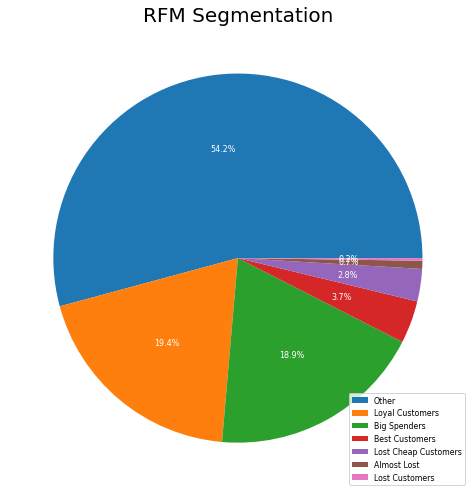

In [38]:
# visualisasi hasil
plt.figure(figsize=(7, 7))
plt.pie(cnt_seg["CustomerID"],
        autopct='%.1f%%',
        textprops={'fontsize': 8,
                   'color': 'white'})
plt.title("RFM Segmentation", fontsize=20)
plt.legend(cnt_seg["segment"], loc='lower right', prop={'size': 7.7})
plt.tight_layout()
plt.show()

In [39]:
# takeout other
seg_new = cnt_seg[cnt_seg["segment"] != "Other"]

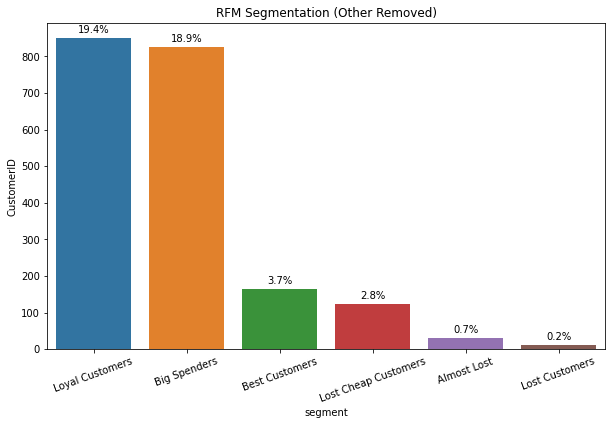

In [40]:
# visualisasi dengan barplot (takeout other segment)
plt.figure(figsize=(10, 6))
x = seg_new["segment"]
y = seg_new["CustomerID"]
percentage = [i for i in seg_new["pct"]]
ax = sns.barplot(x=x, y=y)
patches = ax.patches
for i in range(len(patches)):
    x = patches[i].get_x() + patches[i].get_width()/2
    y = patches[i].get_height()+15
    ax.annotate(f'{percentage[i]}%', (x, y), ha='center')
plt.title("RFM Segmentation (Other Removed)")
plt.xticks(rotation=20)
plt.show()

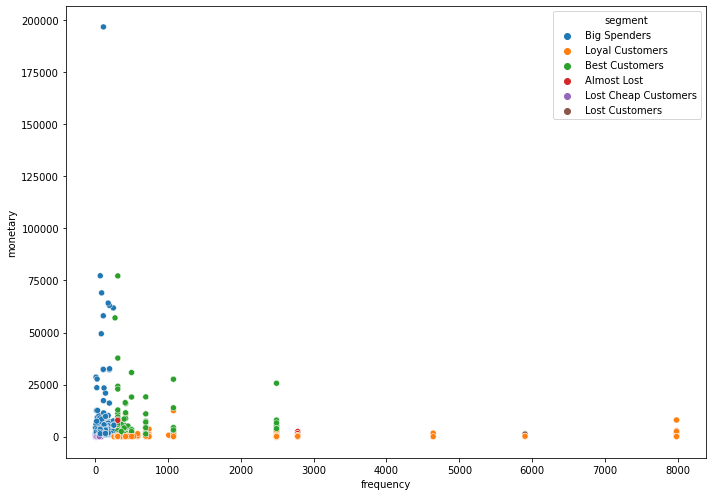

In [41]:
# visualisasi dengan scatter (takeout other segment)
plt.figure(figsize=(10, 7))
sns.scatterplot(data=rfm[rfm["segment"] != "Other"],
                x="frequency",
                y="monetary",
                hue="segment")
plt.tight_layout()
plt.show()

## CLUSTERING

> `explanation here`

> `choose the algorithms and metrics`

> `try recency vs monetary, recency vs frequency, frequency vs monetary` then `pick the proper feature`.

In [42]:
# import library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans, DBSCAN
from sklearn.preprocessing import RobustScaler
from sklearn import metrics

# Library for clustering
import scipy.cluster.hierarchy as sch
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.neighbors import NearestNeighbors
from scipy.spatial.distance import cdist
from sklearn.metrics import davies_bouldin_score

import warnings
warnings.filterwarnings('ignore')

### Recency vs Monetary

In [43]:
X = np.asarray(rfm[["recency", "monetary"]])

In [44]:
# range k from Kmeans
k = range(1, 10)
inertia = []
for i in k:
    model = KMeans(n_clusters=i, max_iter=1000, random_state=0)
    model.fit(X)
    inertia.append(model.inertia_)

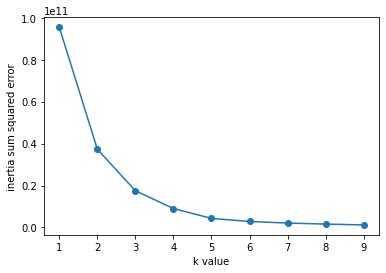

In [45]:
# plot elbow curve
plt.plot(k, inertia, "o-")
plt.xlabel('k value')
plt.ylabel('inertia sum squared error')
plt.show()

In [46]:
# fit model Kmeans
model_km = KMeans(n_clusters = 4, max_iter = 1000, random_state = 0)
model_km.fit(X)

KMeans(max_iter=1000, n_clusters=4, random_state=0)

In [47]:
# predict cluster
rfm["cluster_km_X"] = model_km.predict(X)

In [48]:
# cek hasil
rfm.head()

,CustomerID,last_trans_date,recency,frequency,monetary,R_Quartile,F_Quartile,M_Quartile,RFMScore,segment,cluster_km_X
0,12346.0,2011-01-18,325,180.0,0,4,2,4,424,Other,0
1,12347.0,2011-12-07,2,180.0,2458,1,2,1,121,Big Spenders,0
2,12348.0,2011-09-25,75,123.0,2341,3,3,1,331,Big Spenders,0
3,12349.0,2011-11-21,18,258.0,631,2,2,2,222,Other,0
4,12350.0,2011-02-02,310,5903.0,197,4,1,3,413,Loyal Customers,0


In [49]:
# count tiap clusters
rfm["cluster_km_X"].value_counts()

0    4336
3      26
1       9
2       1
Name: cluster_km_X, dtype: int64

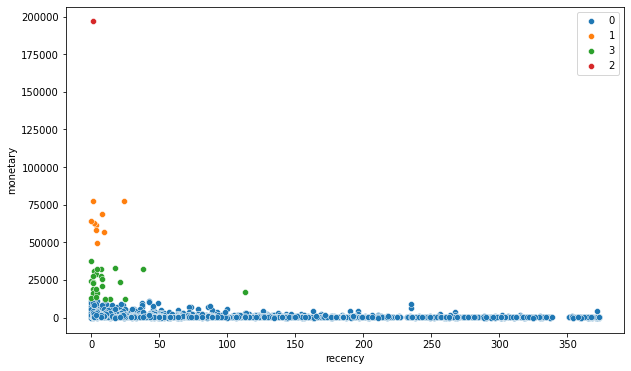

In [50]:
# plot hasil kmeans
plt.figure(figsize=(10, 6))
for i in rfm['cluster_km_X'].unique():
    sns.scatterplot(rfm['recency'][rfm['cluster_km_X'] == i], rfm['monetary'][rfm['cluster_km_X'] == i], label = i)
plt.legend()
plt.show()

In [51]:
X = np.asarray(rfm[["recency", "monetary"]])

In [52]:
# range k dari Kmeans
k = range(1, 10)
inertia = []
for i in k:
    model = KMeans(n_clusters=i, max_iter=1000, random_state=0)  # jumlah cluster akan di loop sebanyak k range(9 times)
    model.fit(X)
    inertia.append(model.inertia_)

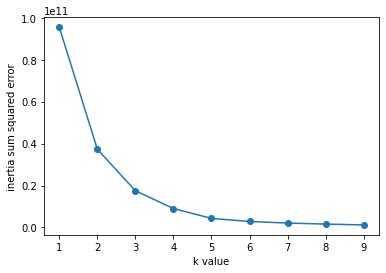

In [53]:
# plot elbow curve
plt.plot(k, inertia, "o-")
plt.xlabel('k value')
plt.ylabel('inertia sum squared error')
plt.show()

In [54]:
# fit model Kmeans
model_km = KMeans(n_clusters=4, max_iter=1000, random_state=0)
model_km.fit(X)

KMeans(max_iter=1000, n_clusters=4, random_state=0)

In [55]:
# predict cluster
rfm["cluster_km_X"] = model_km.predict(X)

In [56]:
# cek hasil
rfm.head()

,CustomerID,last_trans_date,recency,frequency,monetary,R_Quartile,F_Quartile,M_Quartile,RFMScore,segment,cluster_km_X
0,12346.0,2011-01-18,325,180.0,0,4,2,4,424,Other,0
1,12347.0,2011-12-07,2,180.0,2458,1,2,1,121,Big Spenders,0
2,12348.0,2011-09-25,75,123.0,2341,3,3,1,331,Big Spenders,0
3,12349.0,2011-11-21,18,258.0,631,2,2,2,222,Other,0
4,12350.0,2011-02-02,310,5903.0,197,4,1,3,413,Loyal Customers,0


In [57]:
# count tiap clusters
rfm["cluster_km_X"].value_counts()

0    4336
3      26
1       9
2       1
Name: cluster_km_X, dtype: int64

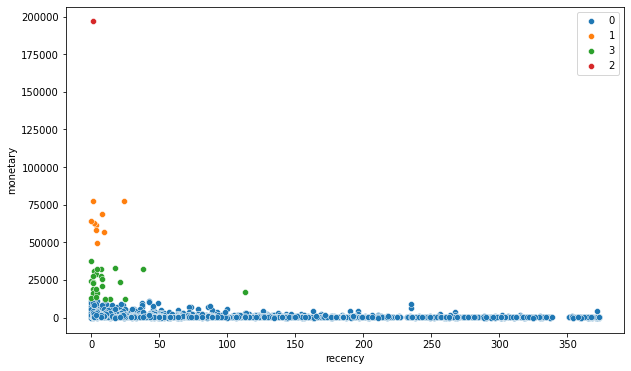

In [58]:
# plot hasil kmeans
plt.figure(figsize=(10, 6))
for i in rfm['cluster_km_X'].unique():
    sns.scatterplot(rfm['recency'][rfm['cluster_km_X'] == i], rfm['monetary'][rfm['cluster_km_X'] == i], label=i)

plt.legend()
plt.show()

In [59]:
print("lower limit cluster 0: ", rfm["monetary"][rfm["cluster_km_X"] == 0].min())
print("upper limit cluster 0: ", rfm["monetary"][rfm["cluster_km_X"] == 0].max())
print()
print("lower limit cluster 1: ", rfm["monetary"][rfm["cluster_km_X"] == 1].min())
print("upper limit cluster 1: ", rfm["monetary"][rfm["cluster_km_X"] == 1].max())
print()
print("lower limit cluster 2: ", rfm["monetary"][rfm["cluster_km_X"] == 2].min())
print("upper limit cluster 2: ", rfm["monetary"][rfm["cluster_km_X"] == 2].max())
print()
print("lower limit cluster 3: ", rfm["monetary"][rfm["cluster_km_X"] == 3].min())
print("upper limit cluster 3: ", rfm["monetary"][rfm["cluster_km_X"] == 3].max())

lower limit cluster 0:  -303
upper limit cluster 0:  11470

lower limit cluster 1:  49390
upper limit cluster 1:  77242

lower limit cluster 2:  196719
upper limit cluster 2:  196719

lower limit cluster 3:  12474
upper limit cluster 3:  37720


#### Summary

1. Cluster 1 is a cluster for customers who make transactions with total payments between 49000-78000.

2. Cluster 2 is a cluster for customers who make transactions with a total payment of 196719.

3. Cluster 3 is a cluster for customers with an average transaction with a total payment of between 12,000-38,000.

4. Cluster 0 is a cluster for customers who make transactions with a total payment below 11500.

## EDA

In [60]:
# merge dataframe
res = pd.merge(df1, rfm, on="CustomerID")

In [61]:
c0 = res[(res['cluster_km_X'] == 0)]
c1 = res[(res['cluster_km_X'] == 1)]
c2 = res[(res['cluster_km_X'] == 2)]
c3 = res[(res['cluster_km_X'] == 3)]

### Insight 1
How was the sales trend over the months?

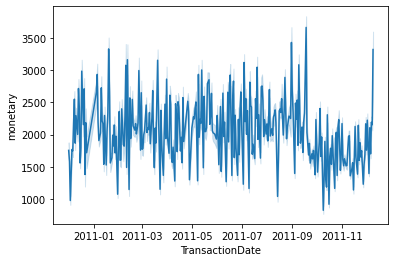

In [62]:
sns.lineplot(data=c0, x='TransactionDate', y='monetary')

In [63]:
c0['monetary'].mean()

1992.8236114351591

> Cluster 0 has a minimum transaction of 1000 pounds with an average total transaction of 1992 pounds.

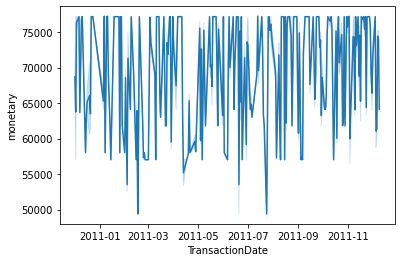

In [64]:
sns.lineplot(data=c1, x='TransactionDate', y='monetary')

In [65]:
c1['monetary'].mean()

69114.1427769311

> Cluster 1 has a minimum total transaction of 5000 with an average for all transactions of 69114 pounds.

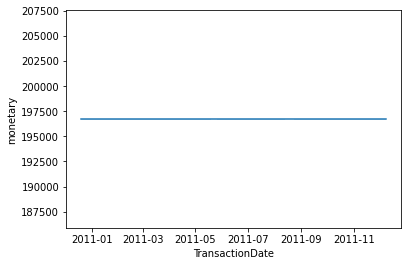

In [66]:
sns.lineplot(data=c2, x='TransactionDate', y='monetary')

> Cluster 2 hanya memiliki 1 transaksi, sehingga plot hanya berbentuk garis.

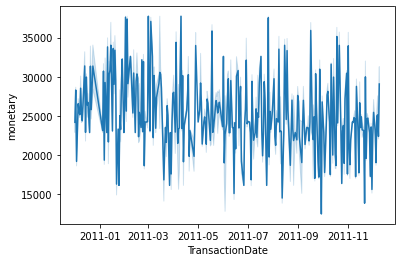

In [67]:
sns.lineplot(data=c3, x='TransactionDate', y='monetary')

In [68]:
c3['monetary'].mean()

23296.209641656533

> Cluster 3 has a total transaction above 10000 with an average total transaction of 23296.

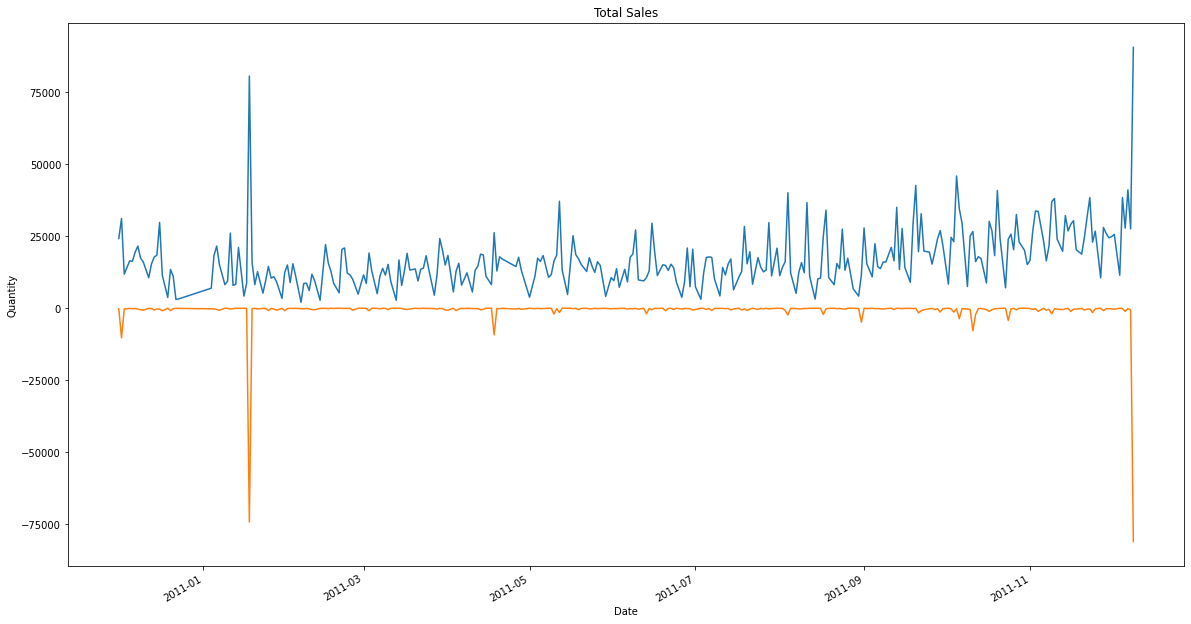

In [69]:
# make plotting for all sales quantity
df_no_cancelled = df[df["cancelled"] == 0]
df_cancelled = df[df["cancelled"] == 1]

time_series = df_no_cancelled.groupby(by='TransactionDate', as_index=False)['Quantity'].sum()
time_series2 = df_cancelled.groupby(by='TransactionDate', as_index=False)['Quantity'].sum()

plt.figure(figsize=(20, 10))
plt.plot(time_series["TransactionDate"], time_series["Quantity"])
plt.plot(time_series2["TransactionDate"], time_series2["Quantity"])
plt.title('Total Sales')
plt.xticks(rotation=30, ha='right')
plt.xlabel('Date')
plt.ylabel('Quantity')
plt.show()

In [70]:
# top 3 sales by quantity
time_series.iloc[time_series['Quantity'].argsort()[-3:]]

,TransactionDate,Quantity
248,2011-10-05,45918
32,2011-01-18,80618
304,2011-12-09,90582


In [71]:
# top 3 cancelled by quantity
time_series2.iloc[time_series2['Quantity'].argsort()[:3]]

,TransactionDate,Quantity
301,2011-12-09,-81030
32,2011-01-18,-74236
1,2010-12-02,-10287


In [72]:
# top 1 sales by amount after deducting by order cancellation
df.groupby(by='TransactionDate', as_index=False)['Quantity'].sum().max()

TransactionDate    2011-12-09 00:00:00
Quantity                         45741
dtype: object

> 

> For the total quantity, the most sales (after deducting canceled transactions) were on 2011-12-09 with a total quantity of 45741 items.

### Insight 2
What are the most frequent purchased products?

In [73]:
c0.groupby(["Description"], as_index=False)["Quantity"].sum().sort_values(by='Quantity', ascending=False).head()

,Description,Quantity
3759,WORLD WAR 2 GLIDERS ASSTD DESIGNS,31128
1750,JUMBO BAG RED RETROSPOT,27958
215,ASSORTED COLOUR BIRD ORNAMENT,27069
3671,WHITE HANGING HEART T-LIGHT HOLDER,22726
2217,PACK OF 12 LONDON TISSUES,19343


In [74]:
c1.groupby(["Description"], as_index=False)["Quantity"].sum().sort_values(by='Quantity', ascending=False).head()

,Description,Quantity
2388,WHITE HANGING HEART T-LIGHT HOLDER,6087
538,CREAM HEART CARD HOLDER,6086
1007,HEART OF WICKER SMALL,6045
1006,HEART OF WICKER LARGE,4602
231,BLACK HEART CARD HOLDER,4140


In [75]:
c2.groupby(["Description"], as_index=False)["Quantity"].sum().sort_values(by='Quantity', ascending=False).head()

,Description,Quantity
465,RABBIT NIGHT LIGHT,4801
640,SPACEBOY LUNCH BOX,4492
392,PACK OF 72 RETROSPOT CAKE CASES,4104
155,DOLLY GIRL LUNCH BOX,4096
530,ROUND SNACK BOXES SET OF4 WOODLAND,3120


In [76]:
c3.groupby(["Description"], as_index=False)["Quantity"].sum().sort_values(by='Quantity', ascending=False).head()

,Description,Quantity
2635,WORLD WAR 2 GLIDERS ASSTD DESIGNS,21319
1757,POPCORN HOLDER,13428
173,ASSTD DESIGN 3D PAPER STICKERS,12540
1207,JUMBO BAG RED RETROSPOT,11434
356,BROCADE RING PURSE,10242


### Insight 3
How many products does the customer purchase in each transaction?

In [77]:
c0['Quantity'].mean()

9.72574283243896

In [78]:
c0.groupby(["CustomerID"], as_index=False)["Quantity"].sum().sort_values(by='Quantity',ascending=False)

,CustomerID,Quantity
3621,17306.0,11470
2058,15159.0,11394
332,12753.0,11250
70,12433.0,11071
2580,15856.0,10941
...,...,...
2867,16252.0,-158
3217,16742.0,-189
1368,14213.0,-244
2555,15823.0,-283


> Cluster 0 has an average purchase of 9 items/transactions, with the highest total purchases from customers with ID 17306.0 with 11470 items.

In [79]:
c1['Quantity'].mean()

46.268067698724636

In [80]:
c1.groupby(["CustomerID"], as_index=False)["Quantity"].sum().sort_values(by='Quantity',ascending=False).head()

,CustomerID,Quantity
0,12415.0,77242
4,14911.0,77180
6,17450.0,69029
8,18102.0,64122
7,17511.0,63012


> Cluster 1 has an average purchase of 49 items/transactions, with the highest total purchases from customers with ID 12415 with 77242 items.

In [81]:
c2['Quantity'].mean()

94.34964028776979

In [82]:
c2.groupby(["CustomerID"], as_index=False)["Quantity"].sum().sort_values(by='Quantity',ascending=False)

,CustomerID,Quantity
0,14646.0,196719


> Cluster 2 only has 1 customer with an average purchase of 94 items/transactions with a total quantity of 196719.

In [83]:
c3['Quantity'].mean()

21.104034046205566

In [84]:
c3.groupby(["CustomerID"], as_index=False)["Quantity"].sum().sort_values(by='Quantity',ascending=False).head()

,CustomerID,Quantity
15,15311.0,37720
20,16422.0,32592
22,17404.0,32324
19,16333.0,32184
18,16029.0,32148


> Cluster 1 has an average purchase of 21 items/transactions, with the highest total purchases from customers with ID 15311 with 37720 items.

### Insigth 4
How does each cluster/group contribute to the company's revenue?

In [85]:
for i in range(4):
    temp1 = res[(res['cluster_km_X'] == i) & (res['Quantity'] < 0)]
    temp2 = res[(res['cluster_km_X'] == i) & (res['Quantity'] > 0)]

    print(f"\nRevenue Cluster {i}:")
    print('Monetary = ', round((temp2['TotalCost'].sum())*1,), 'Pound')
    print('Mean Monetary = ', round((temp2['TotalCost'].mean())*1,), 'Pound')
    print('Cancelled = ', round((temp1['TotalCost'].sum())*1,), 'Pound')
    print('Mean Cancelled = ', round((temp1['TotalCost'].mean())*1,), 'Pound')


Revenue Cluster 0:
Monetary =  6534960 Pound
Mean Monetary =  18 Pound
Cancelled =  -500016 Pound
Mean Cancelled =  -65 Pound

Revenue Cluster 1:
Monetary =  1114610 Pound
Mean Monetary =  93 Pound
Cancelled =  -33474 Pound
Mean Cancelled =  -73 Pound

Revenue Cluster 2:
Monetary =  280206 Pound
Mean Monetary =  135 Pound
Cancelled =  -717 Pound
Mean Cancelled =  -143 Pound

Revenue Cluster 3:
Monetary =  981632 Pound
Mean Monetary =  36 Pound
Cancelled =  -77135 Pound
Mean Cancelled =  -102 Pound


> The largest monetary comes from cluster 0 with a total monetary of 6534960 Pounds, while the smallest comes from cluster 2 with a total monetary of 280206. This is because there is only 1 customer who belongs to cluster 2.

### Insigth 5
What are the interval date between transactions?

In [136]:
for i in range(4):
    ins5 = res[res["cluster_km_X"] == i]
    ins5 = ins5[['last_trans_date', 'TransactionDate',  'recency']]
    print(f"Interval cluster {i}: Min(", ins5['recency'].min(), "days ), Max(" , ins5['recency'].max(), "days )")

Interval cluster 0: Min( 0 days ), Max( 373 days )
Interval cluster 1: Min( 0 days ), Max( 24 days )
Interval cluster 2: Min( 1 days ), Max( 1 days )
Interval cluster 3: Min( 0 days ), Max( 113 days )


### Insigth 6
Based on your findings, what strategy could you recommend to the business to gain more profit?

1. As a whole, lots of transactions were canceled because the store lacked stock to ship, so before that you could check the available stock first and enter the available stock into the system, so that the customer cannot place an order if the stock runs out.

2. Cluster 0 is a cluster that rarely makes transactions, so discount vouchers and free shipping can be made to create a buying habit.

3. Cluster 3 is a cluster that conducts transactions more often than cluster 1. What can be done is to provide free shipping. At this stage the customer has increased his buying habits, so there is no need to provide discount vouchers because the customer will be more focused on the shipping price.

4. Cluster 1 is a cluster that frequently conducts transactions. In this cluster, to protect customers, loyalty can be given.

5. Cluster 2 is the cluster that buys the most. To maintain and increase sales, loyalty and cashback vouchers can be given with a low percentage, a relatively high minimum purchase, and a cashback limit that can be earned.

## PREDICTIVE MODEL BUILDING

> In making predictions, ensemble learning models will be used, such as Random Forest, Extra Tree, Adaboost, and Grandient Boosting. Because ensemble learning is used, there is no need to do outlier handling and scaling. And because the categorical data is already in the form of numbers, the encoding process will not be carried out.

In [87]:
res = pd.merge(df1, rfm, on="CustomerID")

In [88]:
res.to_csv('data_rfm.csv', index=0)

In [89]:
res1 = res[["Quantity", "TotalCost", "recency", "frequency", "monetary", "cluster_km_X", "cancelled"]]
res1.head()

,Quantity,TotalCost,recency,frequency,monetary,cluster_km_X,cancelled
0,6,15.30,302,312.0,1693,0,0
1,6,20.34,302,312.0,1693,0,0
2,8,22.00,302,312.0,1693,0,0
3,6,20.34,302,312.0,1693,0,0
4,6,20.34,302,312.0,1693,0,0


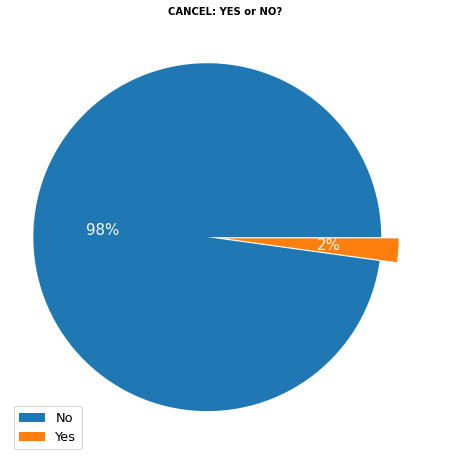

0    397924
1      8905
Name: cancelled, dtype: int64


In [90]:
# plotting target feature
plt.figure(figsize=(10, 8))
plt.title("CANCEL: YES or NO?", size=10, fontweight='bold')
plt.pie(res1['cancelled'].value_counts(), autopct='%.0f%%',
        textprops={'fontsize': 15, 'color': 'white'},
        explode=(0.1, 0))
plt.legend(['No', 'Yes'], loc='lower left', fontsize=13)
plt.show()
print(res1['cancelled'].value_counts())

> There were 2% (8905) canceled transactions.

In [91]:
# Modeling
from sklearn.model_selection import train_test_split, KFold, cross_val_score, cross_validate
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_graphviz
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, recall_score, roc_auc_score, roc_curve, precision_score, f1_score

# Hyperparameter tuning
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

# Imbalanced data
from imblearn.over_sampling import SMOTE 

# Ensembel
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, ExtraTreesClassifier, StackingClassifier, GradientBoostingClassifier

# Pipeline
from sklearn.base import BaseEstimator, TransformerMixin
from imblearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline
from sklearn.compose import ColumnTransformer, make_column_transformer
from imblearn import FunctionSampler

### Logistic Regression

#### Feature Engineering

##### Scaling

In [92]:
# columns for scaling
cols = ['Quantity', 'TotalCost', 'recency', 'frequency', 'monetary']

In [93]:
# sclaing
scaler = RobustScaler()
res1[cols] = scaler.fit_transform(res1[cols])
res1.head()

,Quantity,TotalCost,recency,frequency,monetary,cluster_km_X,cancelled
0,0.1,0.274510,7.972222,0.808612,0.045499,0,0
1,0.1,0.603922,7.972222,0.808612,0.045499,0,0
2,0.3,0.712418,7.972222,0.808612,0.045499,0,0
3,0.1,0.603922,7.972222,0.808612,0.045499,0,0
4,0.1,0.603922,7.972222,0.808612,0.045499,0,0


#### Preparation

In [94]:
# separate target and predictor data
X = res1.drop(['cancelled'], axis=1)
y = res1['cancelled']

In [95]:
# train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [96]:
X_train.isna().sum()

Quantity        0
TotalCost       0
recency         0
frequency       0
monetary        0
cluster_km_X    0
dtype: int64

In [97]:
# modeling
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [98]:
# predict
y_pred = model.predict(X_test)

In [99]:
# view actual and predictive data
result = pd.DataFrame()
result['y_act'] = y_test
result['y_pred'] = y_pred
result.sample(5)

,y_act,y_pred
359589,0,0
218082,0,0
221550,0,0
278773,0,0
123085,0,0


In [100]:
# concat predict data, actual data, dan predictor data
result = pd.concat([X_test, result], axis=1)
result.head()

,Quantity,TotalCost,recency,frequency,monetary,cluster_km_X,y_act,y_pred
149468,3.5,3.954248,0.222222,-0.143541,1.025349,0,0,0
288958,0.7,0.443137,2.305556,0.000000,-0.309067,0,0,0
129114,-0.3,1.490196,-0.166667,-0.095694,0.349041,0,0,0
63987,0.5,0.633987,-0.361111,1.712919,9.500812,3,0,0
191581,0.7,-0.396078,-0.138889,-0.071770,0.277218,0,0,0


In [101]:
# train test score
model_score_tr = model.score(X_train, y_train)
model_score_ts = model.score(X_test, y_test)
score = pd.DataFrame({'Train': [model_score_tr], 'Test': [model_score_ts]})
score

,Train,Test
0,1.0,1.0


#### Evaluation

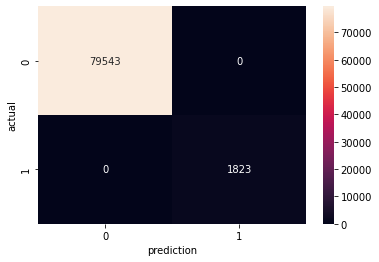

In [102]:
# confusion matrix
sns.heatmap(confusion_matrix(y_test,y_pred), annot=True, fmt='.0f')
plt.xlabel('prediction')
plt.ylabel('actual')
plt.show()

In [103]:
# classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     79543
           1       1.00      1.00      1.00      1823

    accuracy                           1.00     81366
   macro avg       1.00      1.00      1.00     81366
weighted avg       1.00      1.00      1.00     81366



In [104]:
def plot_roc_curve(true_y, y_prob, labels):
    fpr, tpr, thresholds = roc_curve(true_y, y_prob)

    sns.lineplot(fpr, tpr, label=labels)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')

model AUC Score = 1.0



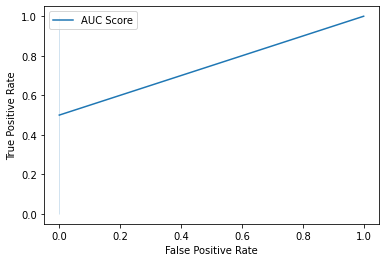

In [105]:
# plot roc auc
plot_roc_curve(y_test, y_pred, 'AUC Score')
print(f'model AUC Score = {roc_auc_score(y_test,y_pred)}\n')
plt.show()

> After predictions were made with logistic regression, a value of 1 was obtained for accuracy. So that it can be considered as a perfect prediction, but it is necessary to look again whether this model is overfit or not.

#### Opimize

##### Handling Imbalanced Data

In [106]:
# persentage data
x = [round(i/len(res1)*100, 2) for i in res1['cancelled'].value_counts()]
pd.DataFrame(data=x, index=['0', '1'], columns=['Data (%)'])

,Data (%)
0,97.81
1,2.19


In [107]:
# use smote for handling imbalanced data
sm = SMOTE(random_state=0)
X_train_sm, y_train_sm = sm.fit_resample(X_train, y_train)

In [108]:
# target after SMOTE
y_train_sm.value_counts()

0    318381
1    318381
Name: cancelled, dtype: int64

In [109]:
# modeling
model_sm = LogisticRegression()
model_sm.fit(X_train_sm, y_train_sm)

y_pred_sm = model_sm.predict(X_test)

In [110]:
# classification report
print(classification_report(y_test, y_pred_sm))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     79543
           1       1.00      1.00      1.00      1823

    accuracy                           1.00     81366
   macro avg       1.00      1.00      1.00     81366
weighted avg       1.00      1.00      1.00     81366



In [111]:
# train test score
model_sm_score_tr = model_sm.score(X_train_sm,y_train_sm)
model_sm_score_ts = model_sm.score(X_test,y_test)
score_sm = pd.DataFrame({'Train': [model_sm_score_tr],
                         'Test' : [model_sm_score_ts]})
score_sm

,Train,Test
0,1.0,1.0


After handling imbalanced data with SMOTE and using a logistic regression model, a value of 1 is also obtained for accuracy. So that it can be considered as a perfect prediction, but it is necessary to look again whether this model is overfit or not.

##### Hyperparameter Tuning

In [112]:
param = [{'solver': ['saga'],
          'penalty': ['elasticnet', 'l1', 'l2', 'none'],
          'max_iter': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100],
          'C': [0.01, 0.1, 1],
          'l1_ratio': [0, 1]},

         {'solver': ['newton-cg', 'lbfgs'],
          'penalty': ['l2', 'none'],
          'max_iter': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100],
          'C': [0.01, 0.1, 1],
          'l1_ratio': [0, 1]}]

> Using random search for the best hyperparameter

In [113]:
model_ht = RandomizedSearchCV(estimator=model, param_distributions=param, cv=5, scoring="f1")

In [114]:
model_ht.fit(X_train_sm, y_train_sm)

RandomizedSearchCV(cv=5, estimator=LogisticRegression(),
                   param_distributions=[{'C': [0.01, 0.1, 1],
                                         'l1_ratio': [0, 1],
                                         'max_iter': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100],
                                         'penalty': ['elasticnet', 'l1', 'l2',
                                                     'none'],
                                         'solver': ['saga']},
                                        {'C': [0.01, 0.1, 1],
                                         'l1_ratio': [0, 1],
                                         'max_iter': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100],
                                         'penalty': ['l2', 'none'],
                                         'solver': ['newton-cg', 'lbfgs']}],
                   scoring='f1')

In [115]:
model_ht.best_params_

{'solver': 'lbfgs', 'penalty': 'none', 'max_iter': 80, 'l1_ratio': 1, 'C': 0.1}

In [116]:
model_ht_tuned = LogisticRegression(solver="lbfgs", penalty="none", max_iter=80, C=0.1, l1_ratio=0)
model_ht_tuned.fit(X_train_sm, y_train_sm)

LogisticRegression(C=0.1, l1_ratio=0, max_iter=80, penalty='none')

##### Evaluation

In [117]:
scores_train = cross_val_score(model_ht_tuned, X_train_sm, y_train_sm, scoring='accuracy', cv=5)
for i, j in enumerate(scores_train):
    print(f"fold no. - {i}, score: {round(j, 2)}")

fold no. - 0, score: 1.0
fold no. - 1, score: 1.0
fold no. - 2, score: 1.0
fold no. - 3, score: 1.0
fold no. - 4, score: 1.0


In [118]:
scores_test = cross_validate(model_ht_tuned, X_train_sm, y_train_sm, cv=5)
for i, j in enumerate(scores_test["test_score"]):
    print(f"fold no. - {i}, score: {round(j, 2)}")

fold no. - 0, score: 1.0
fold no. - 1, score: 1.0
fold no. - 2, score: 1.0
fold no. - 3, score: 1.0
fold no. - 4, score: 1.0


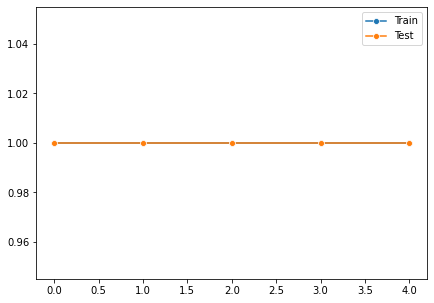

In [119]:
plt.figure(figsize=(7, 5))
sns.lineplot(data=scores_train, label="Train", marker="o")
sns.lineplot(data=scores_test["test_score"], label="Test", marker="o")
plt.show()

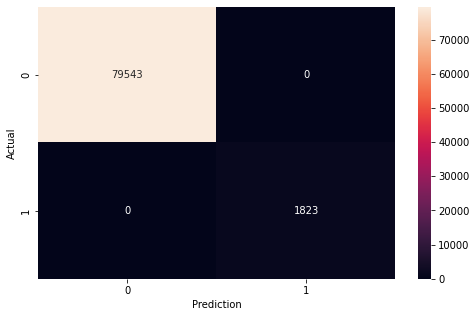

In [120]:
f, ax = plt.subplots(figsize=(8, 5))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='.0f', ax=ax)
plt.xlabel('Prediction')
plt.ylabel('Actual')
plt.show()

In [121]:
y_pred_ht_tuned = model_ht_tuned.predict(X_test)
print(classification_report(y_test, y_pred_ht_tuned))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     79543
           1       1.00      1.00      1.00      1823

    accuracy                           1.00     81366
   macro avg       1.00      1.00      1.00     81366
weighted avg       1.00      1.00      1.00     81366




model AUC score: 1.0



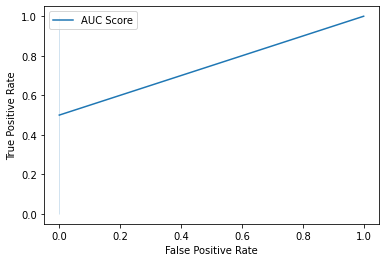

In [122]:
plot_roc_curve(y_test, y_pred_ht_tuned, "AUC Score")
print(f"\nmodel AUC score: {roc_auc_score(y_test, y_pred_ht_tuned)}\n")
plt.show()

> After optimization it turns out that the accuracy value is still at 1, this could be due to good data quality or overfit can occur, so it must be studied more deeply, but for now experiments will be carried out with the ensemble model to compare the results.

### Model Ensamble

In [123]:
# separate target and predictor data
X = res1.drop(columns="cancelled")
y = res1["cancelled"]

In [124]:
# train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [125]:
# modeling using pipeline
rf_pipe = Pipeline([('model', RandomForestClassifier())])
et_pipe = Pipeline([('model', ExtraTreesClassifier())])
ab_pipe = Pipeline([('model', AdaBoostClassifier())])
gb_pipe = Pipeline([('model', GradientBoostingClassifier())])

In [126]:
# modeling
models = [rf_pipe, et_pipe, ab_pipe, gb_pipe]
models

[Pipeline(steps=[('model', RandomForestClassifier())]),
 Pipeline(steps=[('model', ExtraTreesClassifier())]),
 Pipeline(steps=[('model', AdaBoostClassifier())]),
 Pipeline(steps=[('model', GradientBoostingClassifier())])]

In [127]:
# function to find cv score
def cv_score(model, data_x, data_y, scoring, n):
    cv = KFold(n_splits=n, shuffle=False)
    scores_train = cross_val_score(model, data_x, data_y, scoring=scoring, cv=cv)
    scores_test = cross_validate(model, data_x, data_y, cv=n)

    return scores_train.mean(), scores_test["test_score"].mean()

In [128]:
# classification report and cv score
for i in range(len(models)):
    models[i].fit(X_train, y_train)
    preds = models[i].predict(X_test)
    print("ensemble model", i)
    print(classification_report(y_test, preds))
    print("CV:", cv_score(models[i], X_train, y_train, "recall", 5))

ensemble model 0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     79543
           1       1.00      1.00      1.00      1823

    accuracy                           1.00     81366
   macro avg       1.00      1.00      1.00     81366
weighted avg       1.00      1.00      1.00     81366

CV: (1.0, 1.0)
ensemble model 1
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     79543
           1       1.00      0.99      0.99      1823

    accuracy                           1.00     81366
   macro avg       1.00      0.99      1.00     81366
weighted avg       1.00      1.00      1.00     81366

CV: (0.9844537404284676, 0.9996528023720943)
ensemble model 2
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     79543
           1       1.00      1.00      1.00      1823

    accuracy                           1.00     81366
   macro avg     

For the overall ensemble model it is very good because it is above 97%, so any ensemble model can be used to make predictions. But it must be seen first whether this is overfit or not.